## 0. Load libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import psutil
from matplotlib import pyplot as plt
from IPython.display import clear_output

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score

# Set seed for random generators
np.random.seed(42)

## 0.5 Support functions

In [2]:
# Define functions to measure accuracy and resource consumption
def measure_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred, output_dict=True)['accuracy']


def measure_resources():
    cpu = psutil.cpu_percent()
    memory = psutil.virtual_memory().percent
    return cpu, memory


## 1. Load and Preprocess the Data

In [3]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

# Load data
iris_data = load_iris()
wine_data = load_wine()
breast_cancer_data = load_breast_cancer()


## 2.1 Preprocess Iris

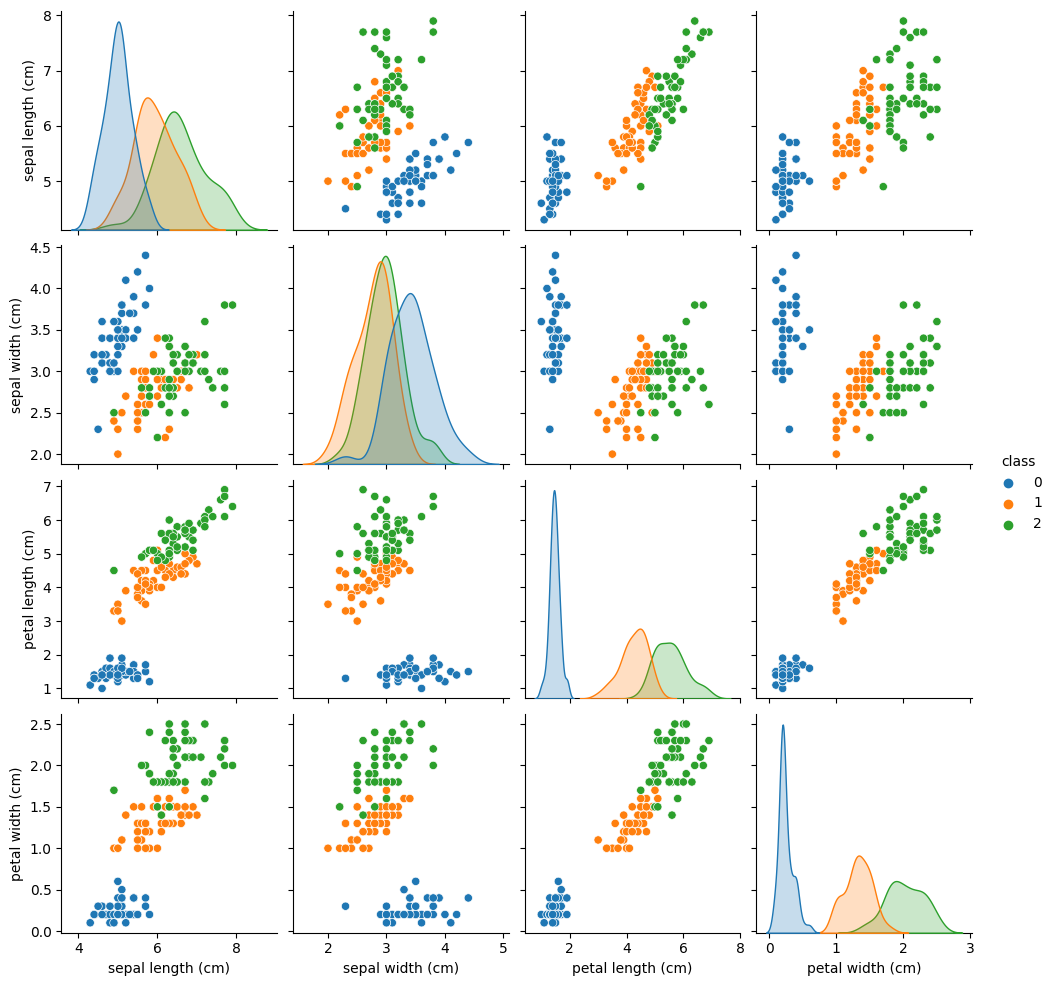

In [4]:
iris_features = iris_data.data
iris_labels = iris_data.target

iris_features = MinMaxScaler().fit_transform(iris_features)

iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df["class"] = pd.Series(iris_data.target)

sns.pairplot(iris_df, hue="class", palette="tab10")


## 2.2 Preprocess Wine

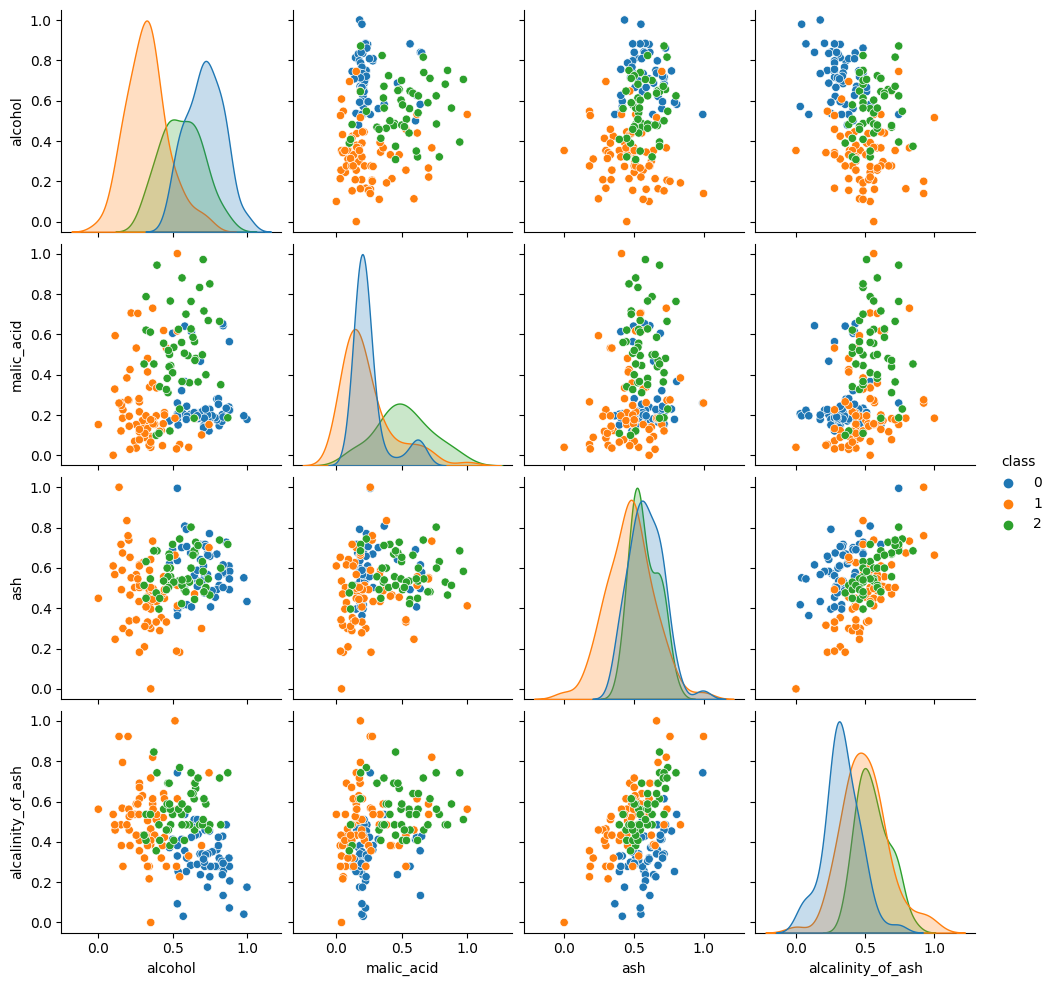

In [5]:
# Limit wine data to 4 features using PCA
wine_features = wine_data.data
wine_labels = wine_data.target

# Apply MinMaxScaler to scale the features
wine_features = MinMaxScaler().fit_transform(wine_features)

# Apply PCA to reduce the number of features to 4
pca = PCA(n_components=4)
wine_features = pca.fit_transform(wine_features)

# Create a DataFrame with the reduced features and class labels
wine_df = pd.DataFrame(wine_features, columns=[
                       'feature1', 'feature2', 'feature3', 'feature4'])
wine_df["class"] = pd.Series(wine_data.target)

# Create a pairplot of the reduced features with class labels as hue
sns.pairplot(wine_df, hue="class", palette="tab10")
plt.show()


## 2.3 Preprocess Breast Cancer

In [1]:
# Limit breast cancer data to 4 features
breast_cancer_features = breast_cancer_data.data
breast_cancer_labels = breast_cancer_data.target

# Apply MinMaxScaler to scale the features
breast_cancer_features = MinMaxScaler().fit_transform(breast_cancer_features)

# Apply PCA to reduce the number of features to 4
pca = PCA(n_components=4)
breast_cancer_features = pca.fit_transform(breast_cancer_features)

# Create a DataFrame with the reduced features and class labels
breast_cancer_df = pd.DataFrame(
    breast_cancer_features, columns=['feature1', 'feature2', 'feature3', 'feature4'])
breast_cancer_df["class"] = pd.Series(breast_cancer_data.target)

# Create a pairplot of the reduced features with class labels as hue
sns.pairplot(breast_cancer_df, hue="class", palette="tab10")
plt.show()


NameError: name 'breast_cancer_data' is not defined

## 3. Build SVM

In [7]:
# Build SVC model

def build_model(X_train, y_train, hidden_layer_sizes=(100, 100), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10):
    model = SVC(
        C=1.0,
        kernel='rbf',
        degree=3,
        gamma='scale',
        coef0=0.0,
        shrinking=True,
        probability=False,
        tol=0.001,
        cache_size=200,
        class_weight=None,
        verbose=False,
        max_iter=-1,
        decision_function_shape='ovr',
        break_ties=False,
        random_state=None
    )
    model.fit(X_train, y_train)
    return model

## 4. Run for all datasets

In [8]:
# Run for all datasets and measure accuracy and resource consumption

datasets = [
    (iris_features, iris_labels, "Iris"),
    (wine_features, wine_labels, "Wine"),
    (breast_cancer_features, breast_cancer_labels, "Breast Cancer")
]

results = []

for X, y, name in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = build_model(X_train, y_train)
    accuracy = measure_accuracy(model, X_test, y_test)
    cpu, memory = measure_resources()
    results.append((name, accuracy, cpu, memory))

results_df = pd.DataFrame(results, columns=["Dataset", "Accuracy", "CPU", "Memory"])


## 5. Print to CSV

In [9]:
results_df.to_csv("SVM_results.csv", index=False)